In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features=10000
maxlen=500
batch_size=32

print('Loading Data...')

(input_train,y_train),(input_test,y_test)=imdb.load_data(num_words=max_features)

print(len(input_train),'train_seq')
print(len(input_test),'test_seq')

input_train=sequence.pad_sequences(input_train,maxlen=maxlen)
input_test=sequence.pad_sequences(input_test,maxlen=maxlen)

print('input_train shape:',input_train.shape)
print('input_test shape:',input_test.shape)

C:\Users\Alekh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Loading Data...
25000 train_seq
25000 test_seq
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(input_train,y_train,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.6510 - acc: 0.6028 - val_loss: 0.5474 - val_acc: 0.7292
Epoch 2/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.4055 - acc: 0.8273 - val_loss: 0.6737 - val_acc: 0.7172
Epoch 3/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.3005 - acc: 0.8790 - val_loss: 0.4507 - val_acc: 0.7918
Epoch 4/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.2292 - acc: 0.9117 - val_loss: 0.4436 - val_acc: 0.8278
Epoch 5/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.1617 - acc: 0.9412 - val_loss: 0.3947 - val_acc: 0.8646
Epoch 6/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.1080 - acc: 0.9639 - val_loss: 0.4844 - val_acc: 0.8306
Epoch 7/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.0736 - acc: 0.9754 - val_loss: 0.4767 - val_acc:

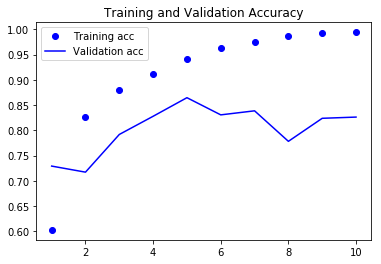

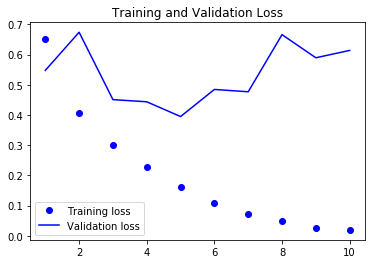

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc' )
plt.plot(epochs,val_acc,'b',label='Validation acc' )
plt.title('Training and Validation Accuracy')

plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss' )
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()



# LSTM

In [7]:
from keras.layers import LSTM

model=Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history=model.fit(input_train,y_train,
                 epochs=10,
                 batch_size=128,
                 validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.5112 - acc: 0.7600 - val_loss: 0.3782 - val_acc: 0.8322
Epoch 2/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.2949 - acc: 0.8844 - val_loss: 0.3307 - val_acc: 0.8590
Epoch 3/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.2328 - acc: 0.9117 - val_loss: 0.3364 - val_acc: 0.8882
Epoch 4/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.1942 - acc: 0.9274 - val_loss: 0.5110 - val_acc: 0.8622
Epoch 5/10
20000/20000 [==============================] - 112s 6ms/step - loss: 0.1761 - acc: 0.9351 - val_loss: 0.2990 - val_acc: 0.8878
Epoch 6/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.1533 - acc: 0.9455 - val_loss: 0.3919 - val_acc: 0.8710
Epoch 7/10
20000/20000 [==============================] - 111s 6ms/step - loss: 0.1403 - acc: 0.9500 - val_loss: 0.3630 - v

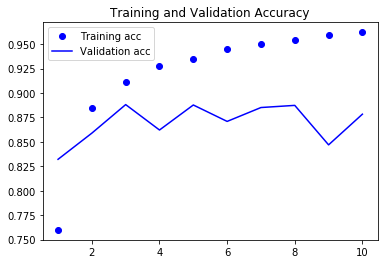

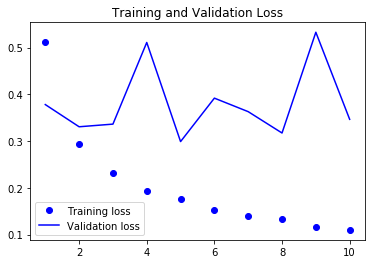

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc' )
plt.plot(epochs,val_acc,'b',label='Validation acc' )
plt.title('Training and Validation Accuracy')

plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss' )
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

